## Assignment:4
1. you have to create one supervisor node.
2. create one router function
3. create three more nodes
    3.1 LLM call (llm node)
    3.2 RAG (rag node)
    3.3 Web crawler(fetch the info in realtime from internet)
4. created one more node after this for validation for generated output --> explore the validation part how to do that
5. if validation going to be failed in that case again go to supervioser node and then supervisor node will again decide what needs to be call next
6. once the validation will pass then only generate the final output

In [84]:
import operator
#from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langgraph.graph import StateGraph,END

In [85]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description="Reasoning behind topic selection")

In [86]:
from langchain.output_parsers import PydanticOutputParser
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [87]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage],operator.add]

In [88]:
# Router function
def router(state:AgentState):
    pass

In [89]:
# Supervisor function
def func1(state:AgentState):
    pass

In [90]:
# LLM function
def func2(state:AgentState):
    pass

In [91]:
# RAG function
def func3(state:AgentState):
    pass

In [92]:
# Web crawler function
def func4(state:AgentState):
    pass

In [93]:
# Validation function
def func5(state:AgentState):
    pass

In [94]:
workflow=StateGraph(AgentState)

In [95]:
workflow.add_node("Supervisor", func1)

In [96]:
workflow.add_node("LLM", func2)

In [97]:
workflow.add_node("RAG", func3)

In [98]:
workflow.add_node("Web Crawler", func4)

In [99]:
workflow.add_node("Validator", func5)

In [100]:
workflow.set_entry_point("Supervisor")

In [101]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call":"RAG",
        "LLM Call": "LLM",
        "Web Crawler Call": "Web Crawler"
    }
)

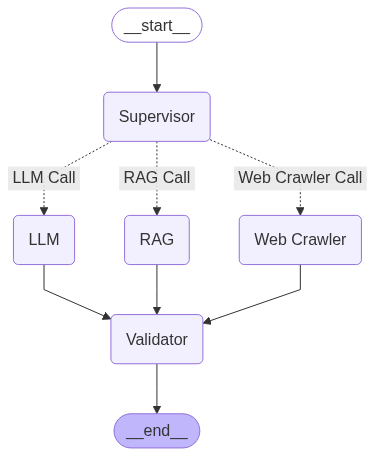

In [103]:
workflow.compile()

In [106]:
workflow.add_edge("RAG","Validator")
workflow.add_edge("LLM","Validator")
workflow.add_edge("Web Crawler","Validator")
workflow.add_edge("Validator",END)

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [104]:
workflow.add_conditional_edges(
    "Validator",
    router,
    {
        "Supervisor Call":"Supervisor",
        "End": END
    }
)

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
